In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az

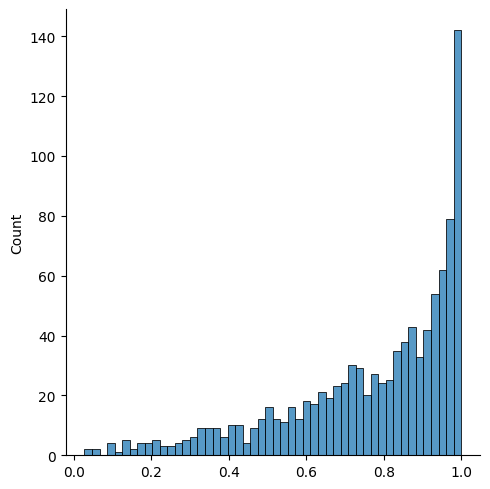

In [26]:
from scipy.stats import norm

#calculate probability that random value is less than 1.96 in normal CDF
sns.displot(norm.cdf(np.random.normal(1, 1, 1000)), bins=50)



In [2]:
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']
sub = subList[10]
# read all conditions and sessions data for a specifit participant
session =1
reverse =21
condition ='Act'
subName = sub
# Main directory of the subject
subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/'
# The adrees name of pickle file
pickelDir = subMainDirec + 'AllBehData/model/hier/' + 'cond-' + str(condition) + '_sess-' + str(session) + '_env-' + str(reverse) + '_Stan-hierRL_simple_normal_group2.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit']



In [3]:
az.summary(fit)[0:20]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alphaAct_hier,0.201,0.167,0.000,0.479,0.005,0.003,618.0,550.0,1.02
alphaClr_hier,0.589,0.287,0.094,1.000,0.012,0.008,748.0,2299.0,1.01
weightAct_hier,0.955,0.035,0.895,1.000,0.002,0.001,321.0,63.0,1.03
sensitivity_hier,0.022,0.014,0.000,0.045,0.000,0.000,971.0,2115.0,1.01
alphaAct_sd,0.587,0.493,0.176,1.384,0.015,0.010,1362.0,2417.0,1.01
alphaClr_sd,0.326,0.497,0.000,1.169,0.028,0.020,119.0,479.0,1.07
weightAct_sd,0.025,0.028,0.000,0.079,0.001,0.001,184.0,65.0,1.04
sensitivity_sd,0.055,0.014,0.030,0.079,0.001,0.000,622.0,3267.0,1.01
alphaAct[0],0.326,0.132,0.109,0.569,0.005,0.003,971.0,1986.0,1.01
alphaAct[1],0.448,0.086,0.289,0.610,0.004,0.003,554.0,229.0,1.02


In [4]:
fit["alphaAct_hier"].shape

(1, 50000)

(15000,)


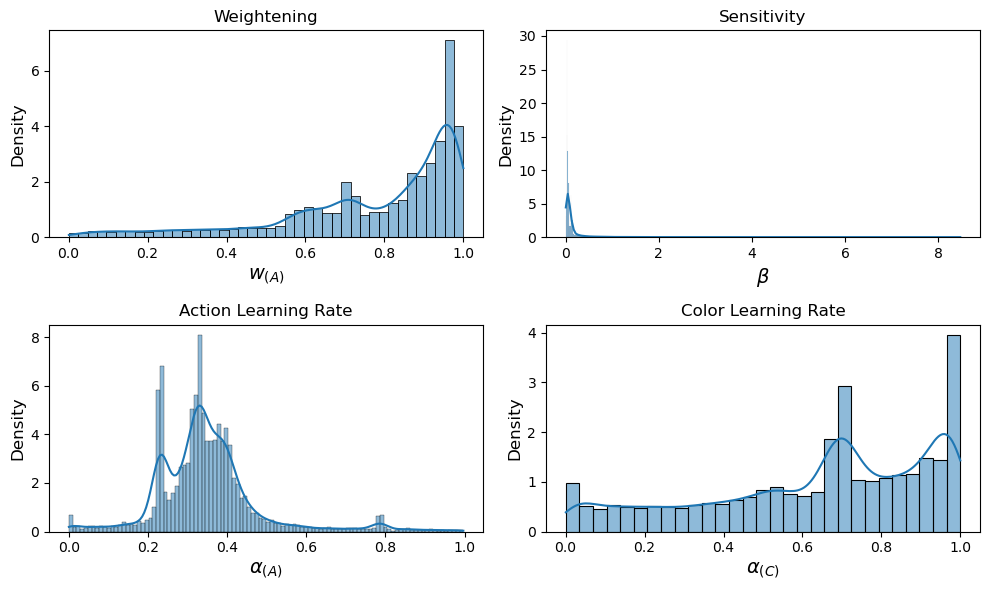

In [5]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_ = fit["alphaAct"][1].flatten()
alphaClr_ = fit["alphaClr"][2].flatten() 
weightAct_ = fit["weightAct"][2].flatten()
beta_ = fit["sensitivity"][2].flatten() 

print(alphaAct_.shape)

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weightAct_, kde=True, stat='density')
plt.title('Weightening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)

# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(beta_, kde=True, stat='density')
plt.title('Sensitivity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$\beta$', fontsize=14)


# Action Learning Rate
fig.add_subplot(rows, columns, 3)
sns.histplot(alphaAct_, kde=True, stat='density')
plt.title('Action Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(A)} $', fontsize=14)

# Color Learning Rate
fig.add_subplot(rows, columns, 4)
sns.histplot(alphaClr_, kde=True, stat='density')
plt.title('Color Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(C)} $', fontsize=14)

plt.subplots_adjust(wspace=10.)

In [2]:
import os
print(os.name)

posix


In [3]:
import platform
print("\nName of the OS system:", platform.system())



Name of the OS system: Linux
